In [194]:
import csv
import os
import re
import numpy as np
from collections import namedtuple
from nilearn import plotting
import matplotlib.pyplot as plt
from nilearn.plotting.cm import _cmap_d

def get_nodes(text):
    data = text.split('_vs_')
    return int(re.findall(r'\d+', data[0])[0]), int(re.findall(r'\d+', data[1])[0])


In [195]:

Node = namedtuple('Node', 'coord code')
atlas = []
atlas_coords = []
with open('Node_AAL116.node', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        atlas.append(Node([float(i) for i in row[0:3]], row[5]))
        atlas_coords.append([float(i) for i in row[0:3]])


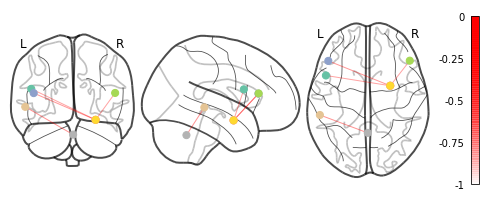

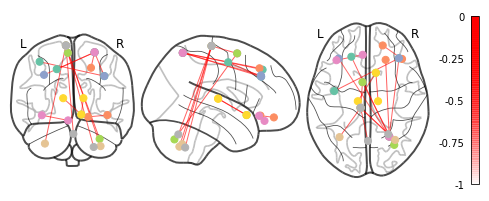

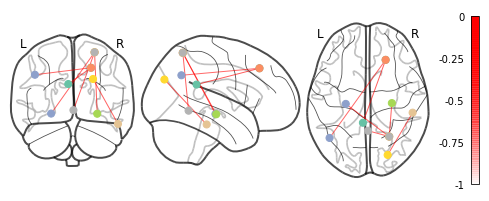

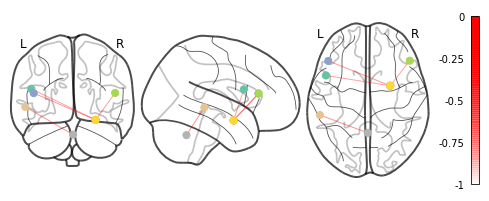

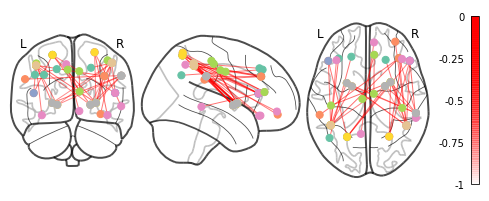

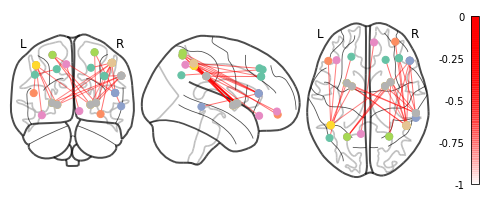

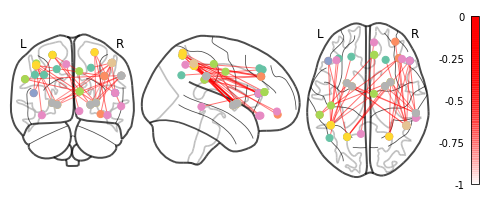

In [196]:
INPUT_DIR = 'input'
Edge = namedtuple('Edge', 'nodes r')

for file_name_csv in os.listdir(INPUT_DIR):
    file_name = file_name_csv.split('.')[0]
    with open(os.path.join(INPUT_DIR, file_name_csv), 'r') as file:
        
        # read the edges from the csv file
        reader = csv.reader(file, delimiter=';')
        edges = []
        for row in reader:
            edges.append(Edge(get_nodes(row[0]), float(row[1].replace(',','.'))))

        # get the cov matrix
        cov = np.identity(len(edges*2))
        for i in range(len(edges)):
            cov[i*2+1][i*2] = cov[i*2][i*2+1] = edges[i].r

        # get the nodes
        nodes = []
        for edge in edges:
            nodes.append(atlas[edge.nodes[0]-1].coord)
            nodes.append(atlas[edge.nodes[1]-1].coord)
        
        plotting.plot_connectome(cov, nodes, colorbar=True, edge_vmin=-1, edge_vmax=0, edge_cmap=_cmap_d['black_pink'])
        plt.savefig(os.path.join('output',file_name + '.png'), dpi=300)


